In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv('imdb_movie_data.csv', encoding='iso-8859-1')

df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# irregular or inappropriate data types were causing error so this is done to get a clear view of the data and their type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
# dealing with data type problems
df['Year'] = df['Year'].str.extract(r'(\d+)', expand=False)

# Convert the 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# to int
df['Year'] = df['Year'].astype('Int64')

df['Duration'] = df['Duration'].str.extract(r'(\d+)', expand=False)

# Convert the 'Duration' column to numeric
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Convert the 'Duration' column to integer
df['Duration'] = df['Duration'].astype('Int64')

df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].astype('Int64')

df['Name'] = df['Name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]+', '', x))

# Strip leading and trailing whitespaces after the replacement
df['Name'] = df['Name'].str.strip()

df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,<NA>,<NA>,Drama,NaN,<NA>,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi He thought he was Gandhi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,2021,90,"Drama, Musical",NaN,<NA>,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,And Once Again,2010,105,Drama,NaN,<NA>,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
# dealing with NaN values
numerical_cols = ['Year', 'Duration', 'Rating', 'Votes']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

df = df[df['Name'].notna() & (df['Name'] != '')].reset_index(drop=True)

# dropping some features for main features extraction
df = df.drop(['Name'], axis=1)

df.head(5)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2021,90,"Drama, Musical",6.0,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,2010,105,Drama,6.0,35,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [6]:
# to check if the data is ready to work with further or not
df.isnull().sum()
# (df['Name'] == '').sum()
# df.head(10)
# df.tail(10)
# df.dtypes

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [7]:
# to get a statistical overview of the data
df.describe()

,Year,Duration,Rating,Votes
count,15508.0,15508.0,15508.000000,15508.0
mean,1987.14773,129.658499,5.919126,71.244326
std,24.991514,19.806378,0.990544,133.124345
min,1913.0,2.0,1.100000,5.0
25%,1969.0,131.0,6.000000,35.0
50%,1991.0,131.0,6.000000,35.0
75%,2008.0,131.0,6.000000,35.0
max,2022.0,321.0,10.000000,999.0


In [8]:
df.to_csv('cleaned_imdb_movie_data.csv', index=False)

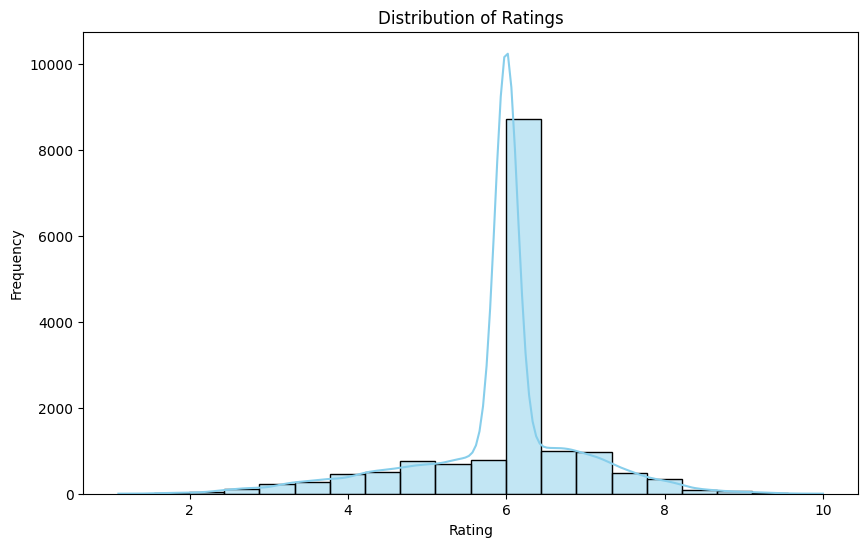

C:\Users\home\AppData\Local\Temp\ipykernel_2576\4068246445.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  genre_counts = sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index, palette='viridis')


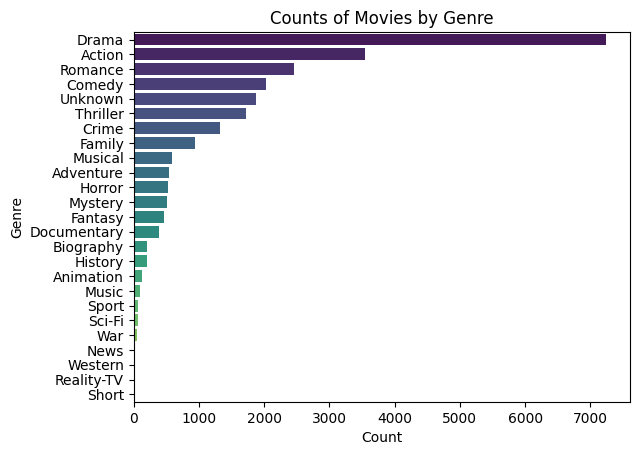

<Figure size 1200x800 with 0 Axes>

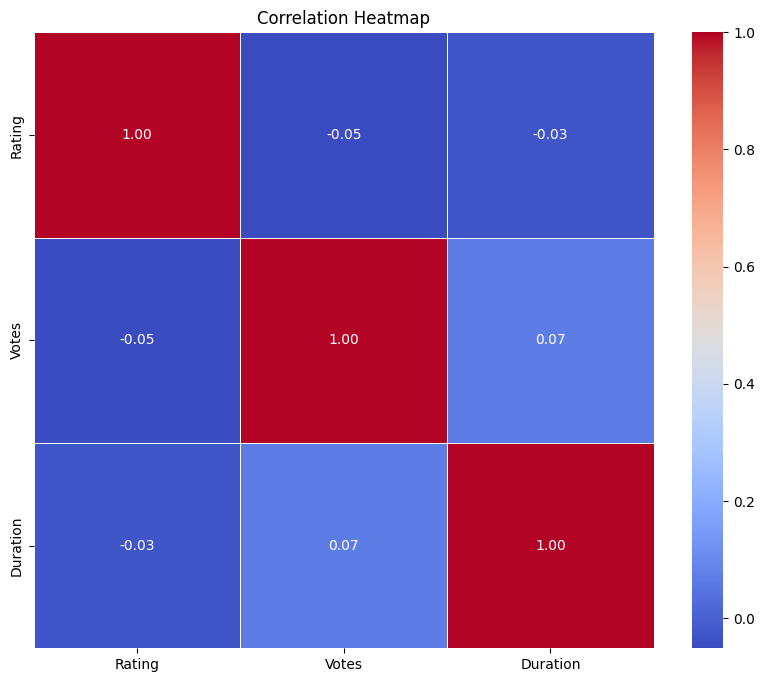

In [9]:
# data visualization

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Extracting genres from the 'Genre' column (assuming genres are comma-separated)
all_genres = [genre.strip() for genres in df['Genre'].str.split(',') if genres is not None for genre in genres]

# Counting occurrences of each genre
genre_counts = sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index, palette='viridis')

# Customizing the plot
plt.figure(figsize=(12, 8))
genre_counts.set_title('Counts of Movies by Genre')
genre_counts.set_xlabel('Count')
genre_counts.set_ylabel('Genre')

# heat map
numerical_columns = ['Rating', 'Votes', 'Duration']

# Create a subset DataFrame with only numerical columns
numerical_df = df[numerical_columns]

# Heatmap for correlation
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# machine learning stage
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'your_dataset.csv' with the actual dataset file)
df = pd.read_csv('cleaned_imdb_movie_data.csv')

# Data preprocessing
# - Handle missing values, remove unwanted characters, convert data types, etc.

# Feature Engineering
# - Explore and create new features if necessary

# Feature Selection
features = ['Votes', 'Duration', 'Year']  # Adjust features based on your dataset
target = 'Rating'
X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training - Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Model Evaluation - Linear Regression
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model:")
print(f'Mean Squared Error: {mse_lr}')
print(f'R-squared: {r2_lr}')

# Model Training - Polynomial Regression
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly.fit(X_train, y_train)

# Model Evaluation - Polynomial Regression
y_pred_poly = model_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Model:")
print(f'Mean Squared Error: {mse_poly}')
print(f'R-squared: {r2_poly}')

# Model Training - Ridge Regression with Hyperparameter Tuning
param_grid = {'alpha': [0.1, 1, 10]}
model_ridge = Ridge()
grid_ridge = GridSearchCV(model_ridge, param_grid, cv=5, n_jobs=-1)  # Parallelize the search
grid_ridge.fit(X_train, y_train)

# Best hyperparameter for Ridge
best_alpha = grid_ridge.best_params_['alpha']

# Model Evaluation - Ridge Regression
y_pred_ridge = grid_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Model:")
print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error: {mse_ridge}')
print(f'R-squared: {r2_ridge}')

# Model Training - Random Forest with Hyperparameter Tuning
param_grid_rf = {'n_estimators': [50, 100, 150],
                 'max_depth': [None, 10, 20, 30]}
model_rf = RandomForestRegressor()
grid_rf = GridSearchCV(model_rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
best_n_estimators = grid_rf.best_params_['n_estimators']
best_max_depth = grid_rf.best_params_['max_depth']

# Model Evaluation - Random Forest
y_pred_rf = grid_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model:")
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')


Linear Regression Model:
Mean Squared Error: 0.969882346348686
R-squared: 0.02161173626275903

Polynomial Regression Model:
Mean Squared Error: 0.9225366269216242
R-squared: 0.06937268005148123

Ridge Regression Model:
Best Alpha: 10
Mean Squared Error: 0.969882353516255
R-squared: 0.021611729032330107

Random Forest Model:
Best n_estimators: 150
Best max_depth: 10
Mean Squared Error: 0.7441559131121132
R-squared: 0.24931780177200058


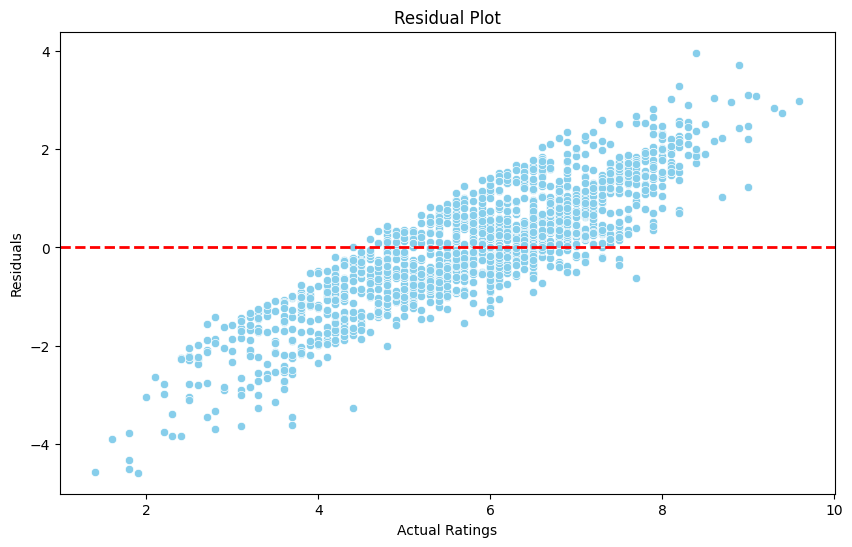

In [13]:
# visualizing the model predictions
residuals = y_test - y_pred_rf

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, color='skyblue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.show()
